In [5]:
import sys
sys.path.append('../../../')

from src import customFunc as cf, ansatzs as anz

from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [9]:
with open("data/hamiltonian0.719.pkl", "rb") as f:
    observable = pickle.load(f)

with open("data/ansatz0.719.pkl", "rb") as f:
    ansatz_circuit = pickle.load(f)

estimator = Estimator()

ValueError: Argument Z must be 2-dimensional.

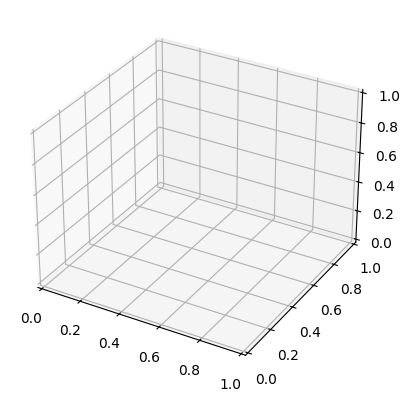

In [12]:
# Vectors for grid
resolution = 100

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

A = np.linspace(-2*np.pi, 2*np.pi, resolution)
B = np.linspace(-2*np.pi, 2*np.pi, resolution)
C = np.linspace(-2*np.pi, 2*np.pi, resolution)

D = np.zeros((resolution, resolution, resolution))

for i in range(resolution):
    for j in range(resolution):
        for k in range(resolution):
            params = [A[i], B[j], C[k]]
            D[i,j,k] = cf.evaluate_observable(params, ansatz_circuit, observable, estimator)

A, B = np.meshgrid(A, B)


# Plot the surface.
surf = ax.plot_surface(A, B, D, linewidth=0, antialiased=False)

plt.show()


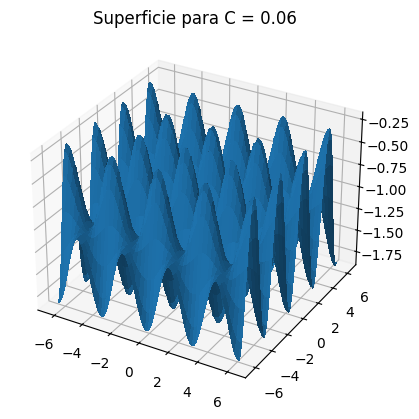

In [16]:
# Rebanada a un valor fijo de C
k_fixed = resolution // 2  # o el índice que quieras
D_slice = D[k_fixed, :, :]  # D en función de A y B, para C fijo

# Reconstruir malla
a = np.linspace(-2*np.pi, 2*np.pi, resolution)
b = np.linspace(-2*np.pi, 2*np.pi, resolution)
A_grid, B_grid = np.meshgrid(a, b)

# Graficar
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(A_grid, B_grid, D_slice.T, linewidth=0, antialiased=False)  # .T para que coincidan los ejes
plt.title(f"Superficie para C = {C[k_fixed]:.2f}")
plt.show()
